In [1]:
import configparser
import os
import pandas as pd

In [2]:
# Extract and assign env variables from config file
config = configparser.ConfigParser()
config.read('aws_config')
profile = config['udacity']

# Export env AWS variables
os.environ['AWS_ACCESS_KEY_ID'] = profile['aws_access_key_id']
os.environ['AWS_SECRET_ACCESS_KEY'] = profile['aws_secret_access_key']
os.environ['AWS_DEFAULT_REGION'] = profile['region']

In [6]:
# Read parquet file from S3 bucket 
df = pd.read_parquet('s3://capstone-project-taxi-data/yellow_trip/2018/1/yellow_tripdata_2018-01.parquet')

In [9]:
# Explore datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760687 entries, 0 to 8760686
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

* Data from January 2018 consists of 8,7 mln records which is an ample size and should be taken into account when selecting technology to process such amount of data
* Data does not include a primary key - a surrogate primary key consisting of VendorID, tpep_pickup_datetime, PULocationID, DOLocationID will be created         

In [12]:
# Check nulls
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     8760675
airport_fee              8760675
dtype: int64

 Most of the columns do not include nulls, congestion_surchage and airport_fee are reasonably including nulls due to fact that not every trip is charged such fees

In [14]:
# Check dataframe statistics
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,8760687.00,8760687.00,8760687.00,8760687.00,8760687.00,8760687.00,8760687.00,8760687.00,8760687.00,8760687.00,8760687.00,8760687.00,8760687.00,8760687.00,12.00,12.00
mean,1.56,1.61,2.80,1.04,164.46,162.73,1.31,12.24,0.32,0.50,1.82,0.30,0.30,15.49,2.50,0.00
std,0.50,1.26,64.12,0.45,66.36,70.31,0.48,11.68,0.45,0.04,2.49,1.74,0.01,14.20,0.00,0.00
min,1.00,0.00,0.00,1.00,1.00,1.00,1.00,-450.00,-44.69,-0.50,-88.80,-15.00,-0.30,-450.30,2.50,0.00
25%,1.00,1.00,0.91,1.00,116.00,113.00,1.00,6.00,0.00,0.50,0.00,0.00,0.30,8.30,2.50,0.00
50%,2.00,1.00,1.55,1.00,162.00,162.00,1.00,9.00,0.00,0.50,1.36,0.00,0.30,11.30,2.50,0.00
75%,2.00,2.00,2.84,1.00,234.00,234.00,2.00,13.50,0.50,0.50,2.35,0.00,0.30,16.62,2.50,0.00
max,2.00,9.00,189483.84,99.00,265.00,265.00,4.00,8016.00,60.00,45.49,441.71,950.70,1.00,8016.80,2.50,0.00


* Some measures have negative values, after discussion with the data owner it was concluded that such trips should be marked as RETURNS
* Data is in normalized form where numeric IDs refer to categories describing the data. 

Attached below is the data dictionary provided by the owner, with decoded IDs - this will serve as a foundation for dimension tables. PULocationID and DOLocationID columns refer to taxi zones - this lookup table is provided by the owner and will be exported into data warehouse as dimension table

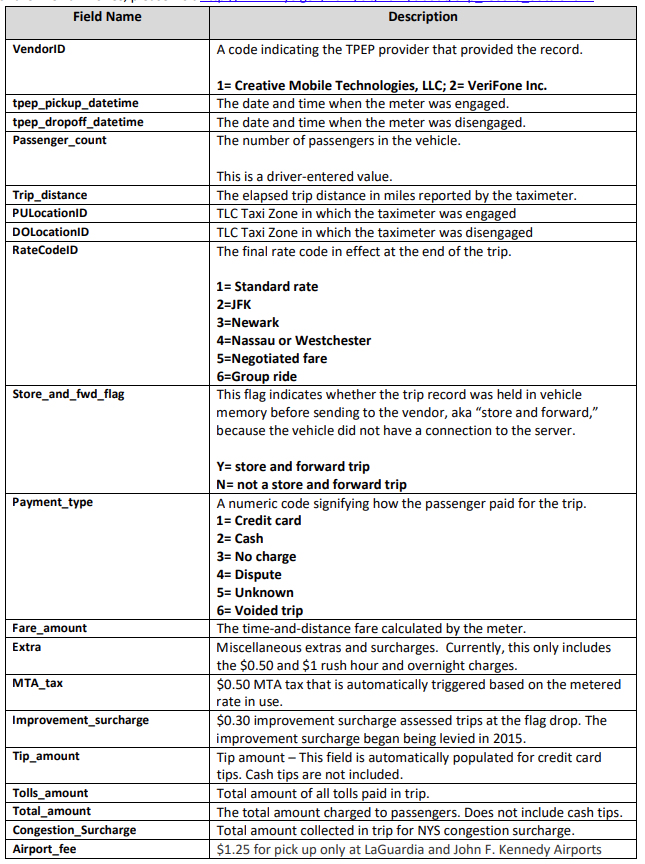